In [5]:
import pandas as pd
import numpy as np

#plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px 

## Introducing the dataset
In order to generate the fake reviews, GPT-2 has been applied to the publicly available Amazon Review Data (2018) dataset, which is extensive and reputable. For the dataset only the Top-10 Amazon categories with the
most product reviews have been considered, accounting for 88.4% of the reviews in the baseline dataset. For each product category, 2000 reviews have been generated

## Data Exploration

In [6]:
dataset_path = 'fake_reviews_dataset.csv'
header_names=['category','rating','label','text']
dataset=pd.read_csv(dataset_path,names = header_names)
dataset

category  rating label  \
0                Home_and_Kitchen_5     5.0    CG   
1                Home_and_Kitchen_5     5.0    CG   
2                Home_and_Kitchen_5     5.0    CG   
3                Home_and_Kitchen_5     1.0    CG   
4                Home_and_Kitchen_5     5.0    CG   
...                             ...     ...   ...   
40427  Clothing_Shoes_and_Jewelry_5     4.0    OR   
40428  Clothing_Shoes_and_Jewelry_5     5.0    CG   
40429  Clothing_Shoes_and_Jewelry_5     2.0    OR   
40430  Clothing_Shoes_and_Jewelry_5     1.0    CG   
40431  Clothing_Shoes_and_Jewelry_5     5.0    OR   

                                                    text  
0      Love this!  Well made, sturdy, and very comfor...  
1      love it, a great upgrade from the original.  I...  
2      This pillow saved my back. I love the look and...  
3      Missing information on how to use it, but it i...  
4      Very nice set. Good quality. We have had the s...  
...                                                  ...  
40427  I had read some reviews saying that this bra r...  
40428  I wasn't sure exactly what it would be. It is ...  
40429  You can wear the hood by itself, wear it with ...  
40430  I liked nothing about this dress. The only rea...  
40431  I work in the wedding industry and have to wor...  

[40432 rows x 4 columns]

In [7]:
dataset.tail(5)

category  rating label  \
40427  Clothing_Shoes_and_Jewelry_5     4.0    OR   
40428  Clothing_Shoes_and_Jewelry_5     5.0    CG   
40429  Clothing_Shoes_and_Jewelry_5     2.0    OR   
40430  Clothing_Shoes_and_Jewelry_5     1.0    CG   
40431  Clothing_Shoes_and_Jewelry_5     5.0    OR   

                                                    text  
40427  I had read some reviews saying that this bra r...  
40428  I wasn't sure exactly what it would be. It is ...  
40429  You can wear the hood by itself, wear it with ...  
40430  I liked nothing about this dress. The only rea...  
40431  I work in the wedding industry and have to wor...

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text      40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [9]:
# We take a look at descriptive statistics
dataset.describe(include='all')

category        rating  label  \
count            40432  40432.000000  40432   
unique              10           NaN      2   
top     Kindle_Store_5           NaN     OR   
freq              4730           NaN  20216   
mean               NaN      4.256579    NaN   
std                NaN      1.144354    NaN   
min                NaN      1.000000    NaN   
25%                NaN      4.000000    NaN   
50%                NaN      5.000000    NaN   
75%                NaN      5.000000    NaN   
max                NaN      5.000000    NaN   

                                                     text  
count                                               40432  
unique                                              40412  
top     This is a really good starter kit, with lots o...  
freq                                                    2  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [10]:
# We check that there no null values
dataset.isna().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [11]:
# We check that the dataset is actually balanced as told in the documentation
dataset.label.value_counts()

OR    20216
CG    20216
Name: label, dtype: int64

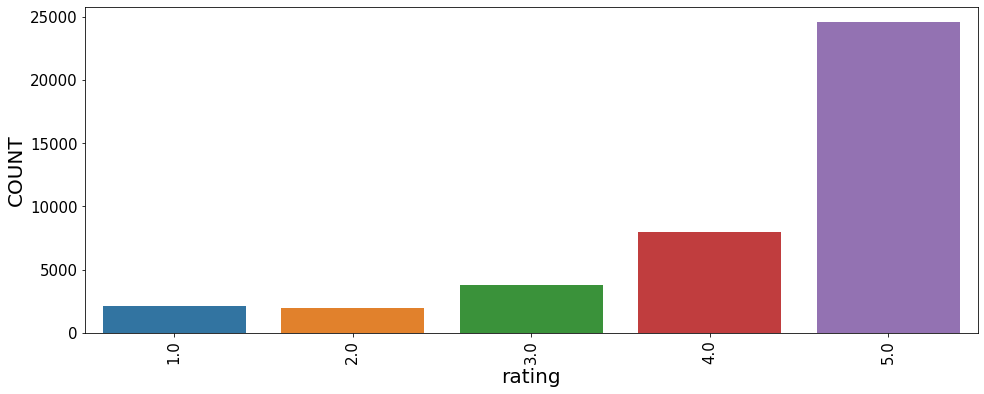

In [12]:
dataset_to_plot = dataset.copy()  # not modify raw dataframe, freedom to apply modification for the plot

# We want to have an idea of the distribution of the ratings ...

var = 'rating'
plt.figure(figsize = (16,6))
ax = sns.countplot(x=var, data=dataset_to_plot);
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(var,fontsize = 20)
plt.ylabel('COUNT',fontsize = 20);
plt.savefig('./imgs/rat_lab.png',facecolor='white',transparent=False)

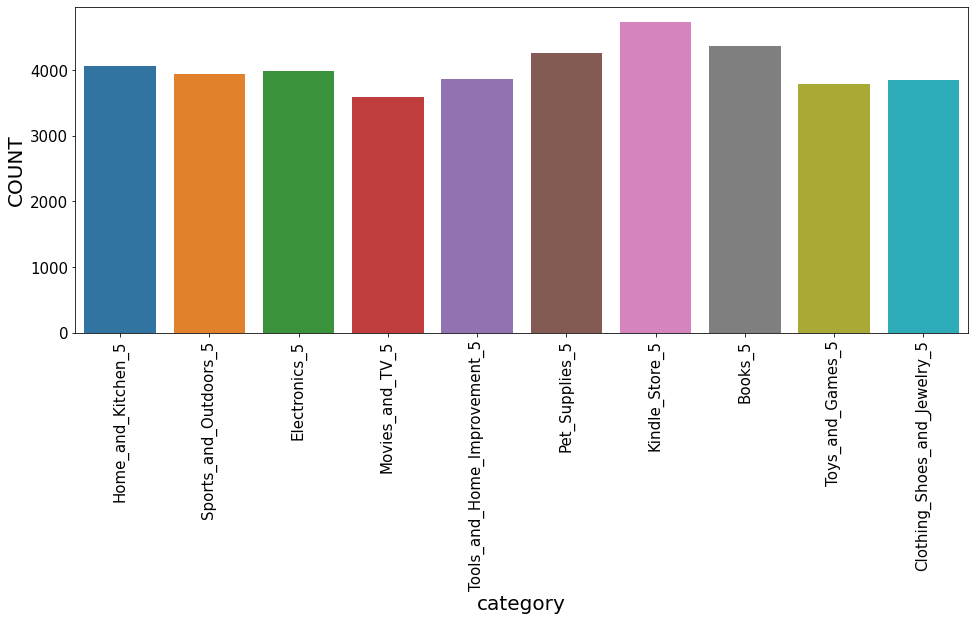

In [13]:
d_plot = dataset.copy()  # not modify raw dataframe, freedom to apply modification for the plot

# ... and the distribution of the categories

var = 'category'
plt.figure(figsize = (16,6))
ax = sns.countplot(x=var, data=d_plot);
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(var,fontsize = 20)
plt.ylabel('COUNT',fontsize = 20);
plt.savefig('./imgs/cat_dist', facecolor='white',transparent=False)

In [14]:
# We want to understand how the data behave with the increasing index

d_plot['label_as_num']=d_plot['label']
d_plot['label_as_num'].replace(['OR', 'CG'],[0, 1], inplace=True)
px.scatter(d_plot['label_as_num'],  color=d_plot['label'])

/home/gianmarco/.local/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



We can see that the labels do not cluster in some space of the index

In [15]:
d_plot['cat_as_num']=d_plot['category']
px.scatter(d_plot['cat_as_num'],  color=d_plot['category'])

In [16]:
d_plot['rat_as_num']=d_plot['rating']
px.scatter(d_plot['rat_as_num'],  color=d_plot['rating'])

In [17]:
# We check if each rating has a balanced number of CG and OR reviews

fig = px.histogram(dataset, x='rating', color='label')
fig.update_xaxes(range=[0, 6])
fig.write_image('./imgs/rat_label.png')
fig.show()

We can notice that the number of reviews for each rating is almost equal for the two labels

In [18]:
# We check if each category has a balanced number of CG and OR reviews

fig = px.histogram(dataset, x='category', color='label')
fig.update_xaxes(range=[-1, 10])
fig.write_image('./imgs/cat_label.png')
fig.show()

We can notice that every category has the same number of CG and OR reviews

## Data Preprocessing

In [19]:
import scipy.stats as stats

contingency=pd.crosstab(dataset['label'], dataset['category'])
chi2 = stats.chi2_contingency(contingency)
print(f'chi_squared: {chi2[0]} , p-value: {chi2[1]}')
contingency=pd.crosstab(dataset['label'], dataset['rating'])
chi2 = stats.chi2_contingency(contingency)
print(f'chi_squared: {chi2[0]} , p-value: {chi2[1]}')

alpha=0.05
dof = 4 #degree of freedom
critical_value = stats.chi2.ppf(q = 1-alpha, df = dof)
chi2[0]>critical_value # if false we cannot reject the null hypotesis that the data are statistically independent

chi_squared: 0.0 , p-value: 1.0
chi_squared: 7.223855752278348 , p-value: 0.12452087428905528


False

In [20]:
# Data cleaning: removing unuseful columns and duplicates

dataset=dataset.drop('rating',axis=1)
dataset=dataset.drop('category',axis=1)
dataset.drop_duplicates(inplace=True)
dataset=dataset.reset_index(drop=True)
dataset

label                                               text
0        CG  Love this!  Well made, sturdy, and very comfor...
1        CG  love it, a great upgrade from the original.  I...
2        CG  This pillow saved my back. I love the look and...
3        CG  Missing information on how to use it, but it i...
4        CG  Very nice set. Good quality. We have had the s...
...     ...                                                ...
40407    OR  I had read some reviews saying that this bra r...
40408    CG  I wasn't sure exactly what it would be. It is ...
40409    OR  You can wear the hood by itself, wear it with ...
40410    CG  I liked nothing about this dress. The only rea...
40411    OR  I work in the wedding industry and have to wor...

[40412 rows x 2 columns]

20 objects have been removed. This number is not relevant wrt to the balancing of the dataset because too small.

In [21]:
# target vector 
y = dataset.iloc[:, 0].values
print(f"y = {y[-20:]}")
y = np.where(y == 'CG', 1, 0)
print(y)
print(f"y = {y[-20:]}")

dataset['label']=y
dataset

y = ['CG' 'OR' 'CG' 'OR' 'CG' 'OR' 'CG' 'OR' 'CG' 'OR' 'CG' 'OR' 'CG' 'OR'
 'CG' 'OR' 'CG' 'OR' 'CG' 'OR']
[1 1 1 ... 0 1 0]
y = [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


label                                               text
0          1  Love this!  Well made, sturdy, and very comfor...
1          1  love it, a great upgrade from the original.  I...
2          1  This pillow saved my back. I love the look and...
3          1  Missing information on how to use it, but it i...
4          1  Very nice set. Good quality. We have had the s...
...      ...                                                ...
40407      0  I had read some reviews saying that this bra r...
40408      1  I wasn't sure exactly what it would be. It is ...
40409      0  You can wear the hood by itself, wear it with ...
40410      1  I liked nothing about this dress. The only rea...
40411      0  I work in the wedding industry and have to wor...

[40412 rows x 2 columns]

/usr/local/lib/python3.8/dist-packages/nltk/decorators.py:69: DeprecationWarning:

`formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gianmarco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/gianmarco/nltk_data...
[nltk_data]   Package words is already up-to-date!


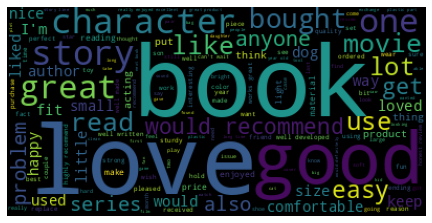

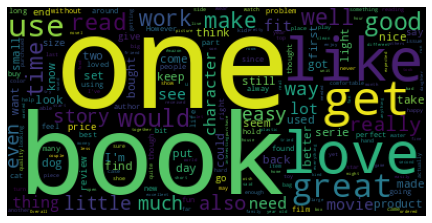

In [22]:
import nltk
from wordcloud import WordCloud

nltk.download('stopwords');
nltk.download('words');

stopwords=nltk.corpus.stopwords.words('english')
complete_text=' '.join(dataset[dataset['label']==1].text)

wc=WordCloud(stopwords=stopwords, background_color='black', max_words=200).generate(complete_text)

plt.figure(figsize=(7.5,5))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.savefig('./imgs/CG_cloud.png')
plt.show()

complete_text=' '.join(dataset[dataset['label']==0].text)

wc=WordCloud(stopwords=stopwords, background_color='black', max_words=200).generate(complete_text)

plt.figure(figsize=(7.5,5))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.savefig('./imgs/OR_cloud.png')
plt.show()

In [23]:
# Data preprocessing: remove all useless meta information, tokenization, stop-word filtering

from sklearn.feature_extraction.text import TfidfVectorizer

# setting max features improves the results 
vectorizer = TfidfVectorizer(stop_words = stopwords,token_pattern=r'(?u)\b[A-Za-z]+\b')

In [24]:

import re

text_analyzer = vectorizer.build_analyzer()

# Data preprocessing: stemming / lemmatizing
from nltk.stem.snowball import SnowballStemmer
sb_stemmer = SnowballStemmer('english')

port_stemmer=nltk.PorterStemmer()

def analyzer2(doc):
    return [port_stemmer.stem(w) for w in text_analyzer(doc)]

def analyzer3(doc):
    return [sb_stemmer.stem(w) for w in text_analyzer(doc)]

print(dataset.text[0])
print(analyzer2(dataset.text[0]))
print(analyzer3(dataset.text[0]))
    

Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
['love', 'well', 'made', 'sturdi', 'comfort', 'love', 'pretti']
['love', 'well', 'made', 'sturdi', 'comfort', 'love', 'pretti']


In [25]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV,
                "S": wordnet.ADJ_SAT}
    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize Single Word with the appropriate POS tag
def analyzer(doc):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text_analyzer(doc)]

lemm_text=dataset.text.apply(lambda x: ' '.join(analyzer(x)))

In [26]:
# Check time required by Porter Stemmer
tmp = dataset.text.apply(lambda x: analyzer2(x))

In [27]:
# Check time required by Lemmatizer
tmp = dataset.text.apply(lambda x: analyzer3(x))

## Data Processing

In [43]:
from sklearn.model_selection import StratifiedKFold

n_folds = 10
skf = StratifiedKFold(n_folds,shuffle=True, random_state=0)

def print_metrics(alg,results):
    metrics = ['accuracy','precision', 'recall', 'f1score']
    print(f'\n{alg}\n')
    for metric in metrics:
        print(f'{metric:15}', np.round(results["test_"+metric].mean(),3), [np.round(elem,3) for elem in results["test_"+metric]])
    print()
    print(f'{"vocabulary size":15}', np.mean([len(results['estimator'][i][0].vocabulary_) for i in range(n_folds)]))
    print(f'{"fit_time":15}', np.round(results["fit_time"].mean()))
    print(f'{"score_time":15}', np.round(results["score_time"].mean()))

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score,recall_score, accuracy_score, make_scorer, f1_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from time import time

comp_res=pd.DataFrame()


start = time()
pipe = Pipeline([('vect', TfidfVectorizer()),
                ('clf', MultinomialNB())])
mnb_res = cross_validate(pipe,
                        lemm_text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score),
                                    'f1score': make_scorer(f1_score,pos_label=1)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) 
print_metrics('MNB',mnb_res)
elapsed = time()-start
print(elapsed)
comp_res['MNB']=mnb_res['test_accuracy']


MNB

accuracy        0.844 [0.83, 0.843, 0.847, 0.849, 0.849, 0.845, 0.853, 0.838, 0.84, 0.846]
precision       0.809 [0.792, 0.805, 0.814, 0.812, 0.821, 0.811, 0.822, 0.805, 0.802, 0.809]
recall          0.9 [0.894, 0.905, 0.899, 0.907, 0.893, 0.899, 0.901, 0.892, 0.903, 0.905]
f1score         0.852 [0.84, 0.852, 0.854, 0.857, 0.855, 0.853, 0.86, 0.846, 0.85, 0.855]

vocabulary size 28911.0
fit_time        3.0
score_time      0.0
11.034559965133667


In [45]:
start = time()
pipe = Pipeline([('vect', TfidfVectorizer()),
                ('clf', LinearSVC())])
lsvc_res = cross_validate(pipe,
                        lemm_text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score),
                                    'f1score': make_scorer(f1_score, pos_label=1)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) 
print_metrics('LSVC',lsvc_res)
elapsed = time()-start
print(elapsed)
comp_res['LSVC']=lsvc_res['test_accuracy']


LSVC

accuracy        0.873 [0.863, 0.872, 0.871, 0.878, 0.872, 0.871, 0.88, 0.872, 0.869, 0.877]
precision       0.868 [0.853, 0.865, 0.867, 0.871, 0.872, 0.862, 0.883, 0.868, 0.865, 0.877]
recall          0.878 [0.878, 0.882, 0.876, 0.888, 0.873, 0.883, 0.877, 0.878, 0.875, 0.876]
f1score         0.873 [0.865, 0.873, 0.871, 0.879, 0.872, 0.872, 0.88, 0.873, 0.87, 0.877]

vocabulary size 28911.0
fit_time        4.0
score_time      0.0
11.36283016204834


In [46]:
start = time()
pipe = Pipeline([('vect', TfidfVectorizer()),
                ('clf', LogisticRegression())])
lr_res = cross_validate(pipe,
                        lemm_text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score),
                                    'f1score': make_scorer(f1_score, pos_label=1)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) 
print_metrics('LR',lr_res)
elapsed = time()-start
print(elapsed)
comp_res['LR']=lr_res['test_accuracy']


LR

accuracy        0.868 [0.859, 0.868, 0.871, 0.875, 0.869, 0.868, 0.872, 0.863, 0.861, 0.871]
precision       0.879 [0.865, 0.876, 0.886, 0.882, 0.885, 0.879, 0.887, 0.874, 0.87, 0.883]
recall          0.853 [0.852, 0.857, 0.852, 0.866, 0.849, 0.853, 0.853, 0.848, 0.848, 0.855]
f1score         0.866 [0.858, 0.867, 0.869, 0.874, 0.866, 0.866, 0.87, 0.861, 0.859, 0.869]

vocabulary size 28911.0
fit_time        5.0
score_time      0.0
14.335093259811401


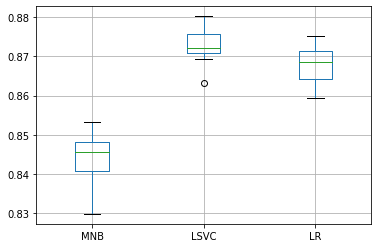

In [47]:
ax=comp_res.boxplot()
ax.figure.savefig('./imgs/cross_box', facecolor='white')

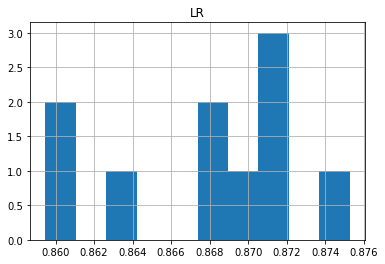

In [48]:
plt.title('MNB')
ax2 = comp_res['MNB'].hist()
ax2.figure.savefig('./imgs/cross_hist_MNB', facecolor='white')
plt.clf()

plt.title('LSVC')
ax2 = comp_res['LSVC'].hist()
ax2.figure.savefig('./imgs/cross_hist_LSVC', facecolor='white')
plt.clf()

plt.title('LR')
ax2 = comp_res['LR'].hist()
ax2.figure.savefig('./imgs/cross_hist_LR', facecolor='white')

In [49]:
# Statistical test
from scipy.stats import wilcoxon
print(wilcoxon(comp_res['MNB'], comp_res['LR'])) # reject null hypotesis with confidence 95%
print(wilcoxon(comp_res['LSVC'], comp_res['LR']))  # reject null hypotesis with confidence 95%
print(wilcoxon(comp_res['MNB'], comp_res['LSVC'])) # reject null hypotesis with confidence 95%

WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)
WilcoxonResult(statistic=1.0, pvalue=0.0069104298078147995)
WilcoxonResult(statistic=0.0, pvalue=0.005033508200606249)
